# 2.3 Lab: Introduction to Python

This is the first lab in the Introduction to Statistical Learning with Python lab series. In these notebooks, we'll show you how to perform the same (or almost the same) tasks that are performed in the original and excellent book _Introduction to Statistical Learning with Applications in R_ by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani, published by Springer.

At the end of every chapter, there is a section called _Lab_ with code in R that shows the methods seen in that chapter
in practice. I thought it would be good to have the same labs in Python language, so I've decided to write this notebook (and the ones that follow). The book can be downloaded for free on [the book's web page](http://www-bcf.usc.edu/~gareth/ISL/).

Although the book does not cover any specific R library, we'll make use of some Python libraries. I think there is no good reason to write every algorithm from scratch in Python as there are so many reliable libraries that have already done this job for us. We'll make use of [SciPy](https://www.scipy.org/), [NumPy](http://www.numpy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) and [scikit-learn](http://scikit-learn.org/) most of the time.

We also do not intend to follow the book rigorously. The key idea here is to present the same _concepts_ and to be a simple guide for those who ever wanted to see the labs in Python instead of R.

## 2.3.1 Basic Commands

Before we introduce the Python language, it is good to tell explicitly what version of Python we're going to use. Below we use the _sys_ standard package to see it.

In [1]:
import sys

sys.version

'3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) \n[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]'

As we can see, the current Python version in my system is 3.6.1, installed via Anaconda.

Anaconda is a bundle of Python packages extremely useful. It contains _NumPy_, _SciPy_ and other packages you may need in order to do science. If you don't have it installed yet, I highly recommend you to visit [Anaconda's download page](https://www.anaconda.com/download/) and get it.

Now we start with the concept of function in Python. A function is defined using the keyword `def` and can have any number of formal parameters, including variable (that are taken as tuple) and keyword arguments. You can also specify default values to parameters to be used when they're not supplied by the client of your function. A basic example is shown below.

In [2]:
def show(first, second, *args, **kwargs):
    print("The first argument is", first)
    print("The second argument is", second)
    
    for arg in args:
        print("Each argument collected by the tuple is", arg)
        
    for parameter, value in kwargs.items():
        print("Each argument collected by keyword is", parameter, "with value", value)
        

show("hello", "world", "a", "different", "argument",
     keyword_arg1="first kwarg", keyword_arg2="second kwarg")

The first argument is hello
The second argument is world
Each argument collected by the tuple is a
Each argument collected by the tuple is different
Each argument collected by the tuple is argument
Each argument collected by keyword is keyword_arg1 with value first kwarg
Each argument collected by keyword is keyword_arg2 with value second kwarg


We can also use the pack and unpack (sometimes referred to as _splat_) features of Python to perform some interesting things like this

In [3]:
args_list = ["a", "different", "argument"]
kwargs_dict = {'keyword_arg1': "first kwarg", 'keyword_arg2': "second kwarg"}

show("hello", "world", *args_list, **kwargs_dict)

The first argument is hello
The second argument is world
Each argument collected by the tuple is a
Each argument collected by the tuple is different
Each argument collected by the tuple is argument
Each argument collected by keyword is keyword_arg1 with value first kwarg
Each argument collected by keyword is keyword_arg2 with value second kwarg


Before we move on, we need to introduce the concept of modules. A module is simply a Python file with code. It can be imported by other modules or scripts and its code can be reused. There are a few different ways to import a module (or its objects). For example

In [4]:
import numpy
import scipy as sc
from pandas import DataFrame
from matplotlib.pyplot import *

Each statement is briefly explained:

* The first statement just makes the _numpy_ module available for us to use. Every object in it (instances, classes, functions etc) used in our code must be preceded by the module's full name.

* The second statement imports the module _scipy_ with the alias _sc_. It is handy since we don't need to write the complete name of the module every time we use its objects. Instead, we use its alias.

* The third import statement just makes a single object (namely the `DataFrame` class) available. We don't need to refer to the _pandas_ modules when using it, but we are limited to this single object.

* The last statement imports all names and objects in the _matplotlib.pyplot_ module. We can now refer to them with their names directly. This is the least recommended form of importing things into Python as it can cause name conflicts and be confuse to know from where things were imported.

Most of the time, we'll use the second form of import. It is more clear and helps keep each object under the module's namespace avoiding potential name conflicts.

Another concept that is important to know are _packages_. Packages are how Python calls any directory that contains an *__init__.py* file and a collection of Python modules.

Below we show the versions of the packages.

In [5]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mpl
import sklearn as sk

print("NumPy version:", np.__version__)
print("SciPy version:", sc.__version__)
print("pandas version:", pd.__version__)
print("Matplotlib version:", mpl.__version__)
print("scikit-learn version:", sk.__version__)

NumPy version: 1.12.1
SciPy version: 0.19.0
pandas version: 0.20.1
Matplotlib version: 2.0.2
scikit-learn version: 0.18.1


That said, we can talk about lists, tuples and the super useful _NumPy arrays_.

Lists are simple... well, lists. They are Python built-in data structures created with `[` and `]` and can be very useful to keep data organized and together. A list can hold different data types sequentially in it and its elements can be accessed via indexing, slicing or through the _iterator_ pattern (lists are so called _iterables_). They can also be concatenated through the `+` operator. A basic usage of lists is shown below.

In [6]:
l1 = [1, 2, 3, 4] # Create a list with four numbers.
l2 = ["hello", "world", 4, 5] # Create a second list with strings and numbers.

# We can iterate over lists with the for statement.
for elem in l2:
    print("Element of l2:", elem)
    
print("The length of l1 is", len(l1)) # The length of a list can be accessed with the len() function.

Element of l2: hello
Element of l2: world
Element of l2: 4
Element of l2: 5
The length of l1 is 4


Tuples are similar to lists. The key difference is mutability. Lists are said _mutable_ data structures since they can be modified any time. Tuples on the other hand are said _immutable_ as they cannot be modified after their creation. In other words, once a tuple is created, it remains the same until it is removed from memory. They are created with `(` and `)` instead of `[` and `]`. Some examples are show below.

In [7]:
t1 = (1, 2, 3, 4) # Create a tuple with four numbers.
t2 = ("hello", "world", 4, 5) # Create a second tuple with strings and numbers.

# We can iterate over tuples with the for statement.
for elem in t2:
    print("Element of l2:", elem)
    
print("The length of t1 is", len(t1)) # The length of a tuple can be accessed with the len() function.

Element of l2: hello
Element of l2: world
Element of l2: 4
Element of l2: 5
The length of t1 is 4


Last but not least, we present NumPy arrays. NumPy arrays are sequential data structures similar to lists, but with some differences. The first and most obvious is that it must be imported befored used as it belongs to the _numpy_ module and are in fact instances of the `np.ndarray` class. The second is that it accepts only elements of the same type: we can not mix data types.

It is worth mentioning that NumPy arrays are much more efficient than built-in lists. It is a consequence of the homogeneity restriction. Since all elements in a NumPy array must be of the same data type, it can use memory more efficiently and reduce many costs that are associated with lists.

Finally, NumPy and SciPy provide many mathematical functions to work with its arrays called _universal functions_ - ufuncs. These are vectorized mathematical operations implemented in low-level with optimization in mind. If you are perfoming some calculations with NumPy arrays, chances are that the functions you need are already implemented in an ufunc. Take a look at the NumPy and SciPy documentations for a complete list of the available ufuncs.

NumPy arrays may be a deep subject, so we'll introduce only the basics. For further information, consult the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html).

In [8]:
import numpy as np # This is the standard way to import NumPy. 

np.set_printoptions(precision=3) # Just set the number of digits to be printed to 3.

v1 = np.array([1, 2, 3, 4]) # We can create a NumPy array from a list as long as all elements have the same data type.
v2 = np.array([10, 20, 30, 40])

print("We can reshape them:") # Reshaping a array changes its structure.
print(v2.reshape(2, 2)) # For example, to a multi dimensional-array (in this case, a 2x2 matrix).
print("Maximum of v2 is", np.max(v2)) # Numpy and scipy provide a number of functions to perform on NumPy arrays.

print("Summing NumPy arrays element-wise", v1 + v2) # Adding NumPy arrays actually sum their elements.

print("Concatenation of v1 and v2", np.concatenate([v1, v2])) # Use NumPy's concatenate function to concatenate two arrays.

print("The length of v1 is", len(v1)) # The length of a NumPy array can be accessed with the len() function.

We can reshape them:
[[10 20]
 [30 40]]
Maximum of v2 is 40
Summing NumPy arrays element-wise [11 22 33 44]
Concatenation of v1 and v2 [ 1  2  3  4 10 20 30 40]
The length of v1 is 4


There are many, many functions that accept NumPy arrays and they perform so well (they are implemented in C) that they became the _de facto_ data structure for numerical methods, statistics, machine learning and scientific computing in general in Python. If you're not so familiar with them yet, I recommend spending some time understading and trying it a little before diving in the world of numerical computing in Python. Many texts introduce them. Personally I recommend Jake VanderPlas' [Python Data Science Handbook](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb), Chapter 2.

As we have already shown, a NumPy array can be transformed into a multi-dimensional array with the `reshape` function. Many other functions exist to change the format or nature of a NumPy array. There is even a `matrix` class in NumPy, although it is not used so much. For the sake of completeness we demonstrate its basics here.

In [9]:
m1 = np.matrix([[1, 2], [3, 4]])
m2 = np.matrix([[10, 20], [30, 40]])
print("First matrix created with matrix:")
print(m1)

print("Second matrix created with matrix")
print(m2)

m3 = np.array([1, 2, 3, 4]).reshape(2, 2)

print("Same as the first matrix but created with array and reshape:")
print(m3)

print("m1 + m2:") # Addition of two matrices follows usual algebra we expect to.
print(m1 + m2)

print("m1 x m2:") # Product also follows the usual linear algebra.
print(m1 * m2)

First matrix created with matrix:
[[1 2]
 [3 4]]
Second matrix created with matrix
[[10 20]
 [30 40]]
Same as the first matrix but created with array and reshape:
[[1 2]
 [3 4]]
m1 + m2:
[[11 22]
 [33 44]]
m1 x m2:
[[ 70 100]
 [150 220]]


Although they are very nice, matrices are not really much used and I am not so sure about the reason. Instead, people seem to prefer to work with multi-dimensional arrays. If you enjoy working with NumPy's matrices, feel free to do so.

When working with randomness, it can be very difficult to reproduce results. If we're generating random numbers in our experiments, we get a different result each time we run the script. It can then become cumbersome to reproduce experiments, talk about results or even be consistent between executions. To fix it, we can make use of _seeds_.

Random numbers generated by a computer are not actually random. They are the result of a series of computations (very well defined and deterministic computations) performed by the computer following a given algorithm, and so these numbers are more accurately called _pseudo-random numbers_. To start generating numbers, an algorithm needs a first, initial value called a seed. For each seed used as input, the algorithm will produce a different but deterministic sequence of pseudo-random numbers. We can control our experiments by providing the same seed to the algorithm in each execution of the script.

The _numpy_ module provides a way to do just that through the `numpy.random.seed` function. Its use is better understood while generating pseudo-random numbers as shown below.

In [10]:
print("No seed: ", np.random.normal(size=5)) # First time running without setting a seed.
print("No seed: ", np.random.normal(size=5)) # Second time running without setting a seed. The results will be different.

np.random.seed(1234) # Set seed to be 1234.
print("Seed is 1234:", np.random.normal(size=5)) # First time running with seed 1234.

np.random.seed(1234) # Set seed to be 1234.
print("Seed is 1234:", np.random.normal(size=5)) # Second time running with seed 1234.

No seed:  [-0.337 -0.338  0.274  0.415  1.424]
No seed:  [ 0.226  0.848  0.696 -0.518 -1.697]
Seed is 1234: [ 0.471 -1.191  1.433 -0.313 -0.721]
Seed is 1234: [ 0.471 -1.191  1.433 -0.313 -0.721]


Each time we set (or reset) a seed, the algorithm starts fresh, generating the same sequence from the beginning. This way, we can be sure of the numbers that will be generated each time we run the script. Actually, I am so sure about the sequence that I can even tell you here: [0.471 -1.191  1.433 -0.313 -0.721] (but there is no way I can tell you the first two sequences without the seed).

There is a lot of interesting things we can do with NumPy arrays. The most basics are summary statistics as mean, median, variance, standard deviation and so on. We show how below.

In [11]:
np.random.seed(1234) # Set seed to 1234.

x = np.random.normal(size=10) # Generate a new array of pseudo-random number drawn from a standard normal distribution.

print("The array is", x) # All methods are from numpy module.
print("The mean of x is", np.mean(x))
print("The median of x is", np.median(x))
print("The variance of x is", np.var(x))
print("The standard deviation of x is", np.std(x))

The array is [ 0.471 -1.191  1.433 -0.313 -0.721  0.887  0.86  -0.637  0.016 -2.243]
The mean of x is -0.143683492447
The median of x is -0.148477761989
The variance of x is 1.10648680223
The standard deviation of x is 1.05189676405


## 2.3.2 Graphics

To plot things, we'll use the standard _matplotlib.pyplot_ module from _matplotlib_. It provides a vast set of plotting features, customization capabilities and is quite flexible to work with. Here we'll explore just the basics, enough to get  you started. Again, I recommend taking a look at Jake VanderPlas' [Python Data Science Handbook](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb), Chapter 4 this time.

> Note that we also import seaborn. This is just for aesthetic questions for now. Anyway, we recommend you to take a look at this module if you're interested in a higher-level visualization library.

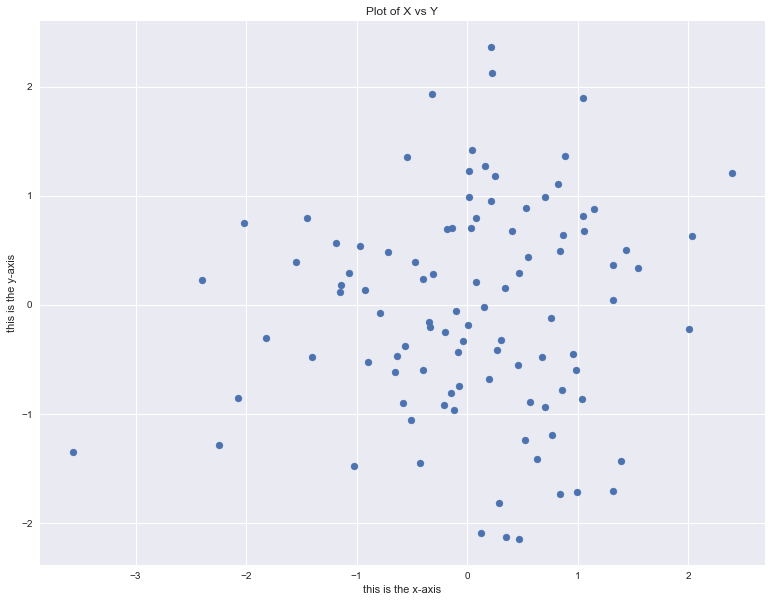

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt # This is the standard way to import matplotlib.pyplot.
import seaborn as sns # Seaborn is used here just to provide a better look.
sns.set()

np.random.seed(1234) # Keep it reproducuble.

x = np.random.normal(size=100)
y = np.random.normal(size=100)

fig, ax = plt.subplots(figsize=(13, 10)) # Create new Figure and Axes objects.

plt.scatter(x, y) # This is one of the most basic plots. It simply plots points.

plt.xlabel("this is the x-axis") # We can add title, labels, legend etc.
plt.ylabel("this is the y-axis")
plt.title("Plot of X vs Y");

We can also save plots to files. The examples below show how to save figures to both .pdf and .jpeg files.

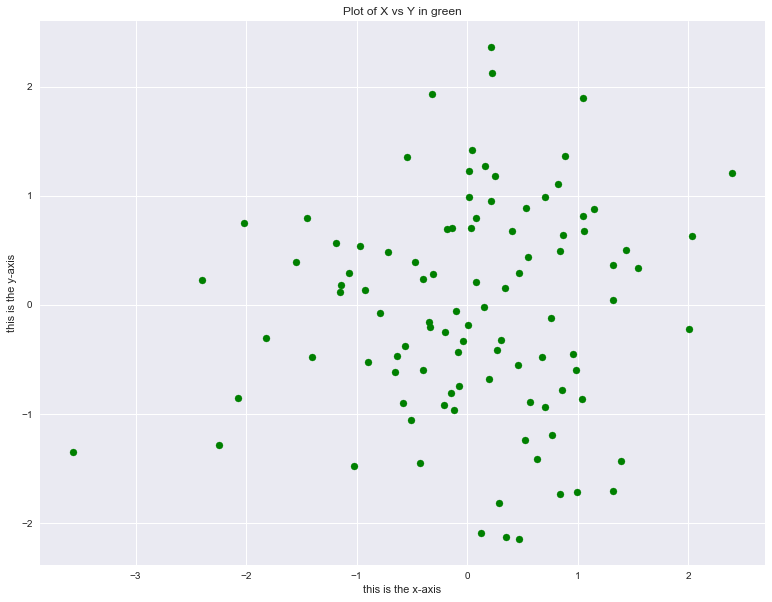

In [13]:
f = plt.figure(figsize=(13, 10))

plt.scatter(x, y, color="green")

plt.xlabel("this is the x-axis") # We can add title, labels, legend etc.
plt.ylabel("this is the y-axis")
plt.title("Plot of X vs Y in green");

f.savefig("Figure.pdf", bbox_inches='tight') # Save the current plot to a .pdf file.
f.savefig("Figure.jpeg", bbox_inches='tight') # Save the current plot to a .jpeg file.

To create a range of values, there are a plenty of functions available for us. Since we'll work mostly with the NumPy module, it makes sense to present the NumPy way of creating range of values. It is accomplished with the `np.arange()` and  `np.linspace` functions.

In [14]:
import math # Necessary to use the pi constant.

x = np.arange(1, 11) # Creates a np.array from 1 to 11, exclusive. A third parameter would specify the step.

print("x is", x)

x is [ 1  2  3  4  5  6  7  8  9 10]


In [15]:
x = y = np.linspace(-math.pi, math.pi, 50) # np.linspace also creates sequences evenly spaced.

We can use the recently created variables `x` and `y` (actually they are NumPy arrays) to make a grid of values.

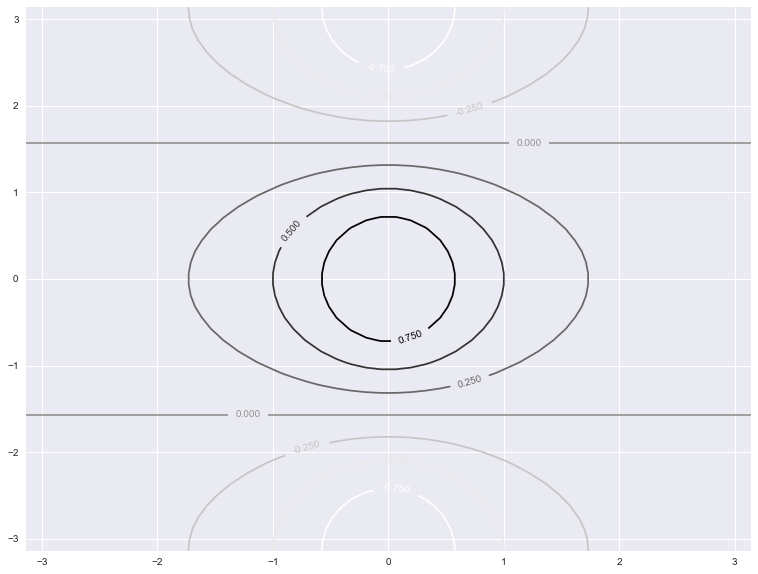

In [16]:
X, Y = np.meshgrid(x, y) # We can create a grid of values.
Z = np.cos(Y)/(1 + X**2) # That can be used to create 3D plots.

plt.figure(figsize=(13, 10))

contour = plt.contour(X, Y, Z) # plt.contour is the standard way to create simple contour plots.
plt.clabel(contour, inline=1, fontsize=10);

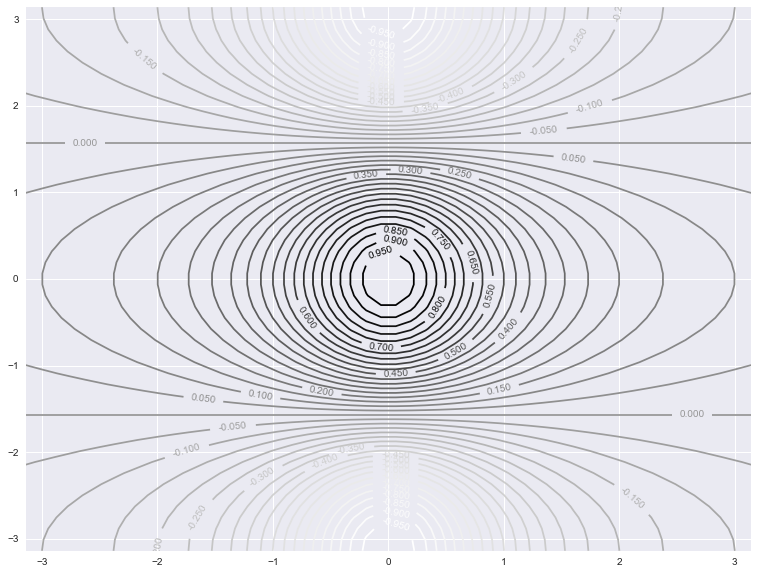

In [17]:
plt.figure(figsize=(13, 10))

contour = plt.contour(X, Y, Z, 45) # We can specify the number of levels. Here we ask for 45 contour levels.
plt.clabel(contour, inline=True, fontsize=10);

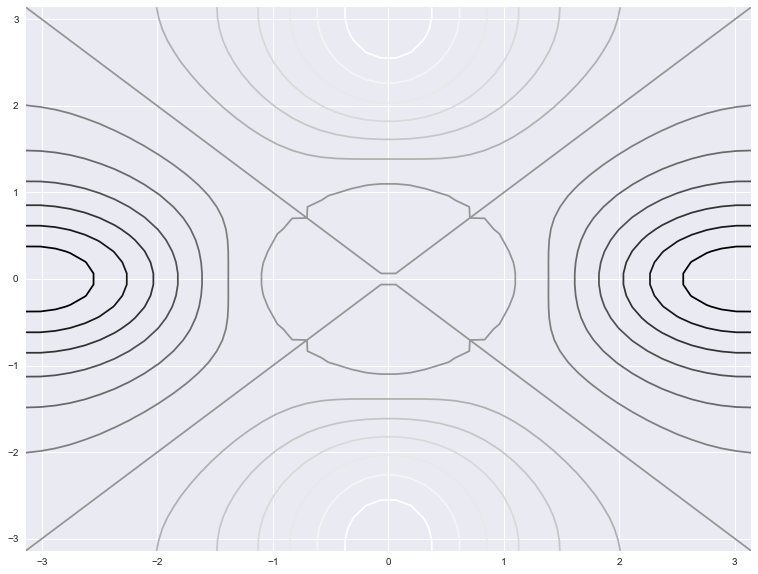

In [18]:
Za = (Z - np.transpose(Z))/2

plt.figure(figsize=(13, 10))

plt.contour(X, Y, Za, 15)
plt.clabel(contour, inline=1, fontsize=10);

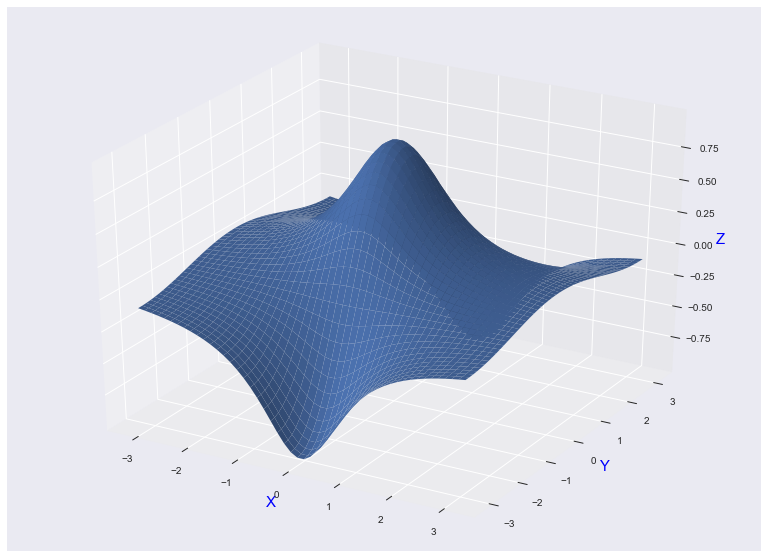

In [19]:
from mpl_toolkits.mplot3d import Axes3D # Necessary to plot 3D.

fig = plt.figure(figsize=(13.5, 10))
ax = fig.gca(projection='3d') # Specify that we want 3D plots.

ax.plot_surface(X, Y, Z)

font = {'color': 'blue', 'size': 15}

ax.set_xlabel("X", fontdict=font)
ax.set_ylabel("Y", fontdict=font)
ax.set_zlabel("Z", fontdict=font)

plt.show()

The _matplotlib_ library is huge. There are tons of plots with many customization settings available. You can tweak every detail of your figure objects or even create new ones. The possibilities are so many. The [matplotlib documentation](https://matplotlib.org/contents.html) can be handy sometimes.

Its flexibility can also be a problem. With so many customizable features, sometimes it is hard to find exactly what you want without getting lost in the process. To address this problem, a few other visualization libraries are available. We can cite here _seaborn_, _plotly_ and even a Python version of the incredible R's ggplot2 called _ggplot_.

## 2.3.3 Indexing Data

Now we show you how to index and select data from lists, tuples and NumPy arrays. There are many ways to do this, we intend to show just the basics.

In [20]:
# Lists

l1 = [1, 2, 3, 4] # Create a list with four numbers.
l2 = ["hello", "world", 4, 5] # Create a second list with strings and numbers.

print("The first element of l1 is", l1[0]) # Indexing starts at zero.
print("The last element of l1 is", l1[-1]) # We can index it backwards using negative indices.
print("Wow we can slice", l1[1:3]) # Slicing is done with the pattern 'start:end'. The end is exclusive.

# We can modify any of its elements.
l2[2] = "again"
l2[3] = "and again"

The first element of l1 is 1
The last element of l1 is 4
Wow we can slice [2, 3]


In [21]:
# Tuples

t1 = (1, 2, 3, 4) # Create a tuple with four numbers.
t2 = ("hello", "world", 4, 5) # Create a second tuple with strings and numbers.

print("The first element of t1 is", t1[0]) # Indexing starts at zero.
print("The last element of t1 is", t1[-1]) # We can index it backwards using negative indices.
print("Wow we can slice", t1[1:3]) # Slicing is done with the pattern 'start:end'. The end is exclusive.


The first element of t1 is 1
The last element of t1 is 4
Wow we can slice (2, 3)


In [22]:
# NumPy arrays

v1 = np.array([1, 2, 3, 4]) # We can create a NumPy array from a list as long as all elements have the same data type.
v2 = np.array([10, 20, 30, 40])

print("First element of v1", v1[0], "and last element of v2", v2[-1]) # Same as lists just shown.
print("Slicing also works", v1[1:3]) # The end is exclusive.
print("Slicing indefinitely", v1[1:]) # We don't even need to supply an ending point. Just leave it blank.
print("We can slice with step", v1[::2]) # Every other element, starting at index 0.
print("First, third and fourth elements of v1", v1[[0, 2, 3]]) # This is called fancy indexing.
print("First, third and fourth elements of v1 again", v1[[True, False, True, True]]) # This is called masking.
print("First, sec... again", v1[v1 != 2]) # Boolean comparisons can also be used for indexing.

print("Dim of v1", v1.ndim) # Size of each dimension.
print("Shape of v1", v1.shape) # Number of dimensions.
print("Size of v1", v1.size) # Total size in bytes.

First element of v1 1 and last element of v2 40
Slicing also works [2 3]
Slicing indefinitely [2 3 4]
We can slice with step [1 3]
First, third and fourth elements of v1 [1 3 4]
First, third and fourth elements of v1 again [1 3 4]
First, sec... again [1 3 4]
Dim of v1 1
Shape of v1 (4,)
Size of v1 4


## Loading Data

I think the most similar way to load data from .csv files into Python compared to R's `read.csv()` function is through the _pandas_ library's `read_csv()` function. In fact, the parameters it accepts are very similar to those of R's `read.csv()` function. To demonstrate how this works, we'll load the Auto.csv from the data/ directory.

In [23]:
import pandas as pd # This is the standard way to import pandas.

auto = pd.read_csv("../data/Auto.csv", na_values="?") # NA values are coded as "?" in the Auto.csv.

print("auto is a DataFrame object:", type(auto))

auto is a DataFrame object: <class 'pandas.core.frame.DataFrame'>


The _pandas_ module is our best friend when we need to deal with structured, tabular data. It is the Python version of the `data.frame` data structure from R. It provides many useful methods that operate in similar way to that of `data.frame`. Abstractions and operations that were provided by _dplyr_ for example are now embedded into the `DataFrame` class.

If you're planning to play with data in Python, _pandas_ is mandatory. Again I recommnd to read Jake VanderPlas' [Python Data Science Handbook](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb), Chapter 3.

Moving on. The same way we've got information about the structure of `v1` above, we can get about `auto`.

In [24]:
print("Dim of auto", auto.ndim)
print("Shape of auto", auto.shape)
print("Size of auto", auto.size)

Dim of auto 2
Shape of auto (397, 9)
Size of auto 3573


We can take a look at the first rows

> Note that the end in the construction `start:end` is always exclusive. In the example below, it means that we are looking at rows 1, 2, 3 and 4 and columns from 1 to 6. Neither the row 5 nor the column 7 are selected.

In [25]:
auto.iloc[1:5, 1:7]

,cylinders,displacement,horsepower,weight,acceleration,year
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


We can drop all `np.na` values from our dataframe by calling its `dropna()` method. In the case of the `auto` dataframe, there are 5 rows with `np.na` values. When we drop these rows, we end up with less rows.

In [26]:
auto.dropna().shape

(392, 9)

We can get the column names of a `DataFrame` by accessing its `columns` attribute.

In [27]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

We can also access columns directly as if it was a attribute of the object. For example

In [28]:
auto.cylinders[1:5]

1    8
2    8
3    8
4    8
Name: cylinders, dtype: int64

## 2.3.5 Additional Graphical and Numerical Summaries

Now we are working with _pandas dataframes_. We can access its columns very easily. Let's try to plot the _cylinders_ and _mpg_ columns of the `auto` dataframe.

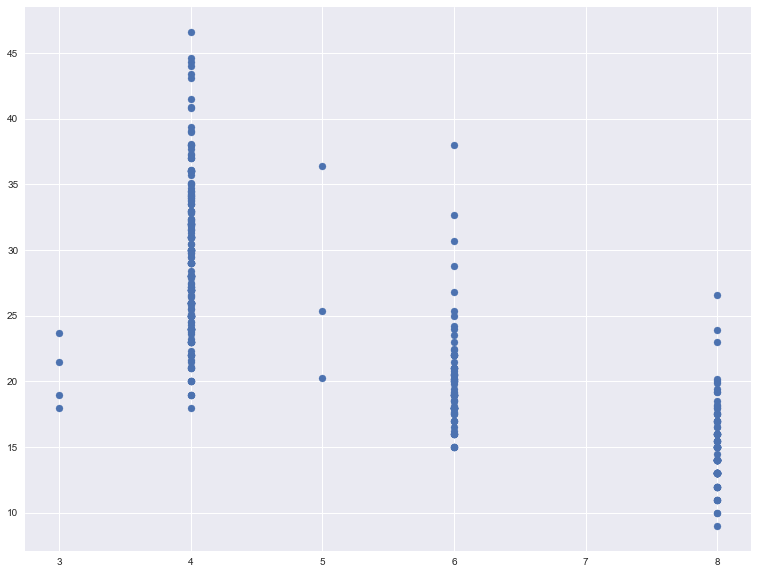

In [29]:
plt.figure(figsize=(13, 10))

plt.scatter(auto['cylinders'], auto['mpg']);

We can convert the _cylinders_ columns from its numerical representation to _categories_: Python name for what R calls factors.

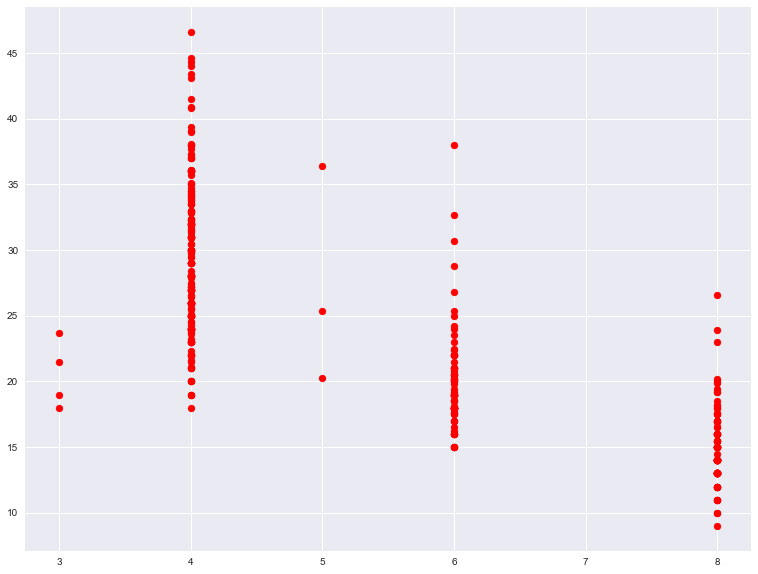

In [30]:
auto['cylinders'] = auto['cylinders'].astype('category')

plt.figure(figsize=(13, 10))

plt.scatter(auto['cylinders'], auto['mpg'], color="red");

So far we've used only the scatter plot from _matplotlib_. However there are many other types of graphs. Below we show the histogram available through the `plt.hist()` function.

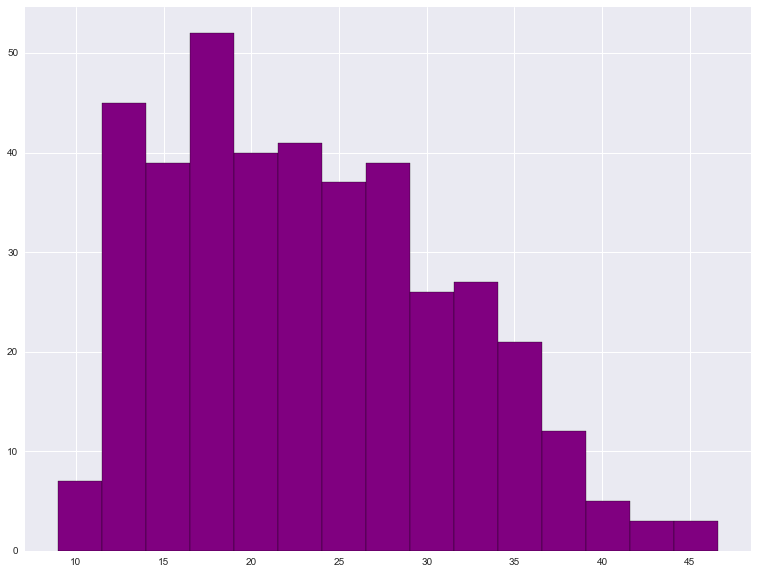

In [31]:
plt.figure(figsize=(13, 10))

plt.hist(auto['mpg'], color="purple", bins=15, ec="black");

The _pandas_ library provides the `scatter_matrix()` function that works similar to the `pairs()` function in R.

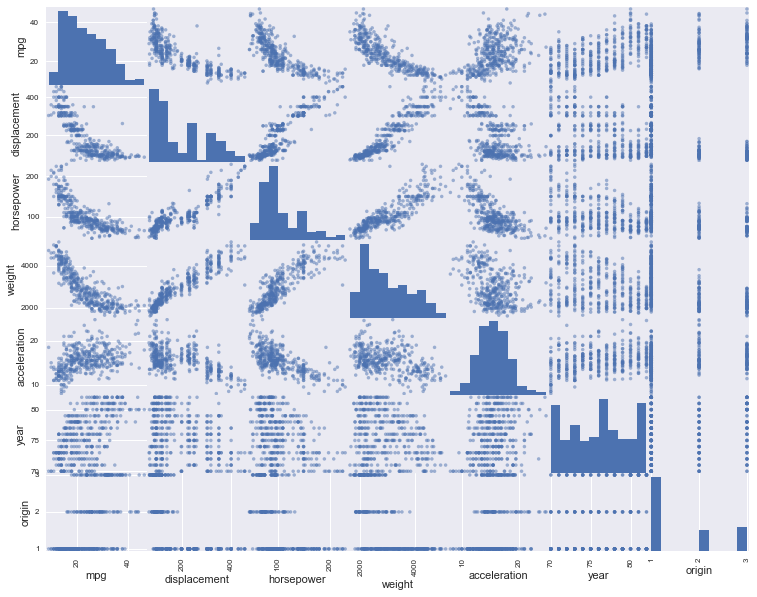

In [32]:
pd.plotting.scatter_matrix(auto, figsize=(12.6, 10));

Finally we can see a summary of the dataframe using the `DataFrame.describe()` function. It displays the same basic statistics about the data that the `summary()` function in R does.

In [33]:
auto.describe()

,mpg,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


It is also possible to use `describe()` in a single column. Here we use the attribute accessor to column.

In [34]:
auto.mpg.describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

## Conclusion

Well, there is no conclusion subsection in the labs, but I'll put one here.

It was our very first notebook in the series _An Introduction to Statistical Learning with Python_ labs. It was not meant to be neither an exhaustive introduction to Python and its libraries nor literal translation of the labs of the book. It is just a point of view from the Python perspective of those labs.

I hope you enjoyed.